In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 4_Olymbics analysis\olympics_dataset.csv'
data = pd.read_csv(file_path)


In [3]:
 # Display the first few rows of the dataset
print(data.head())

   player_id                   Name Sex            Team  NOC  Year  Season  \
0          0              A Dijiang   M           China  CHN  1992  Summer   
1          1               A Lamusi   M           China  CHN  2012  Summer   
2          2            Gunnar Aaby   M         Denmark  DEN  1920  Summer   
3          3            Edgar Aabye   M  Denmark/Sweden  DEN  1900  Summer   
4         26  Cornelia (-strannood)   F     Netherlands  NED  1932  Summer   

          City       Sport                         Event     Medal  
0    Barcelona  Basketball   Basketball Men's Basketball  No medal  
1       London        Judo  Judo Men's Extra-Lightweight  No medal  
2    Antwerpen    Football       Football Men's Football  No medal  
3        Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4  Los Angeles   Athletics  Athletics Women's 100 metres  No medal  


In [4]:
# Data Cleaning: Check for missing values
print(data.isnull().sum())

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


In [5]:
# Basic Statistics
print(data.describe())

          player_id           Year
count  2.525650e+05  252565.000000
mean   2.305499e+05    1981.743908
std    4.289330e+05      32.596548
min    0.000000e+00    1896.000000
25%    5.713700e+04    1960.000000
50%    1.356110e+05    1988.000000
75%    2.118590e+05    2008.000000
max    9.460001e+06    2024.000000


D:\AnacondaApplication\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AnacondaApplication\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


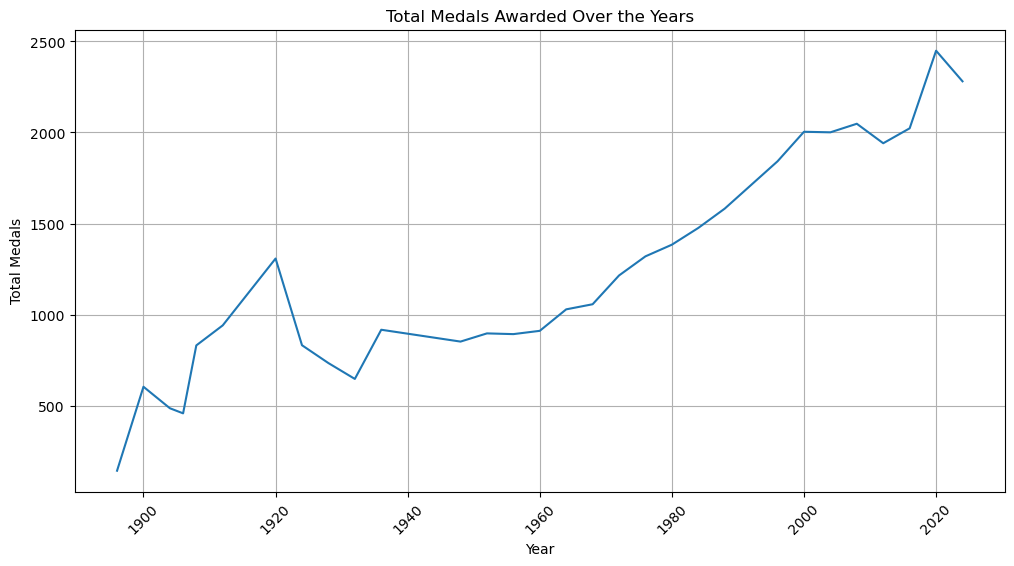

In [6]:
# Trends in Olympic Performances Over the Years
medal_counts = data[data['Medal'] != 'No medal'].groupby('Year')['Medal'].count().reset_index()
medal_counts.rename(columns={'Medal': 'Total Medals'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=medal_counts, x='Year', y='Total Medals')
plt.title('Total Medals Awarded Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.grid()
plt.show()

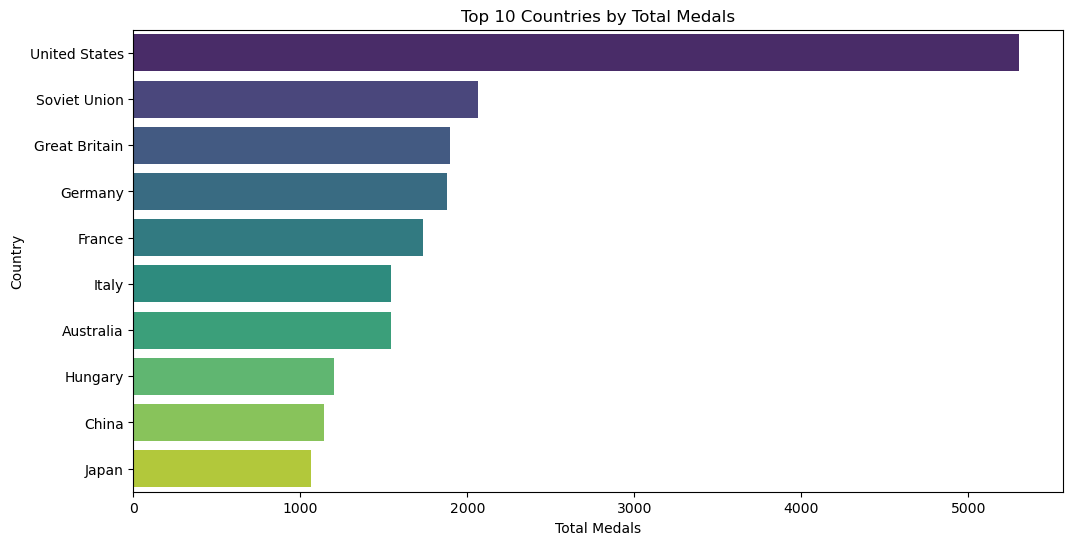

In [7]:
# Comparative Analysis of Different Countries' Achievements
country_medals = data[data['Medal'] != 'No medal'].groupby('Team')['Medal'].count().reset_index()
country_medals.rename(columns={'Medal': 'Total Medals'}, inplace=True)
country_medals = country_medals.sort_values(by='Total Medals', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=country_medals, x='Total Medals', y='Team', palette='viridis')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.show()

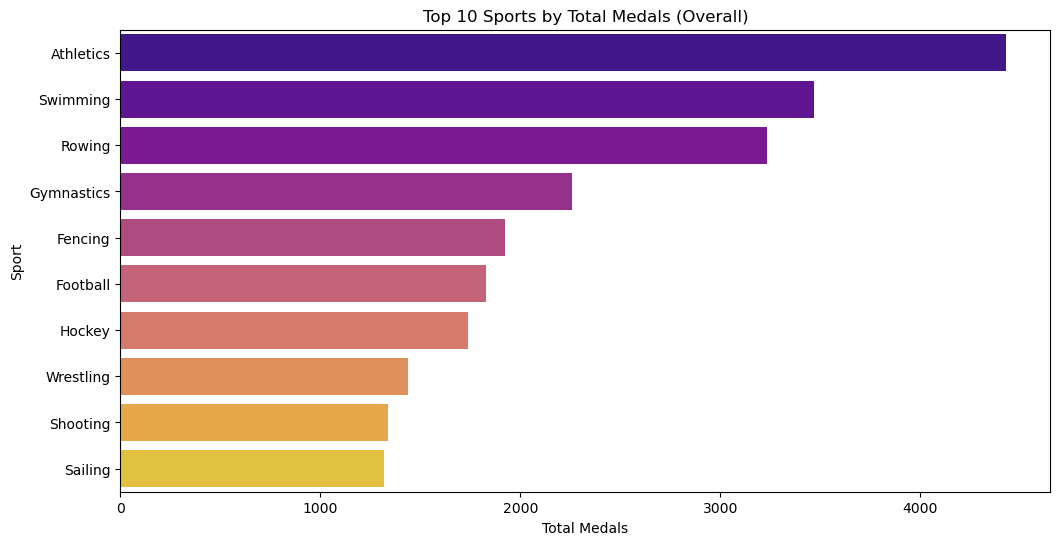

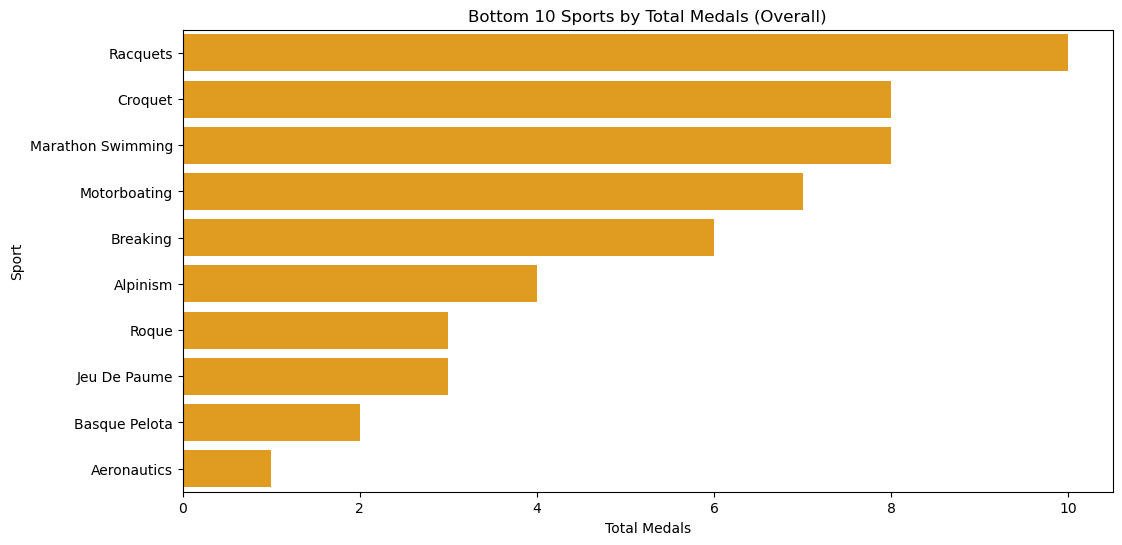

In [12]:
# Performance Analytics for Specific Sports
sport_medals = data[data['Medal'] != 'No medal'].groupby('Sport')['Medal'].count().reset_index()
sport_medals.rename(columns={'Medal': 'Total Medals'}, inplace=True)
sport_medals = sport_medals.sort_values(by='Total Medals', ascending=False)

# Top 10 Sports
top_10_sports = sport_medals.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_sports, x='Total Medals', y='Sport', palette='plasma')
plt.title('Top 10 Sports by Total Medals (Overall)')
plt.xlabel('Total Medals')
plt.ylabel('Sport')
plt.show()

# Bottom 10 Sports
bottom_10_sports = sport_medals.tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_10_sports, x='Total Medals', y='Sport', color='orange')  # Change color to orange
plt.title('Bottom 10 Sports by Total Medals (Overall)')
plt.xlabel('Total Medals')
plt.ylabel('Sport')
plt.show()

D:\AnacondaApplication\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AnacondaApplication\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


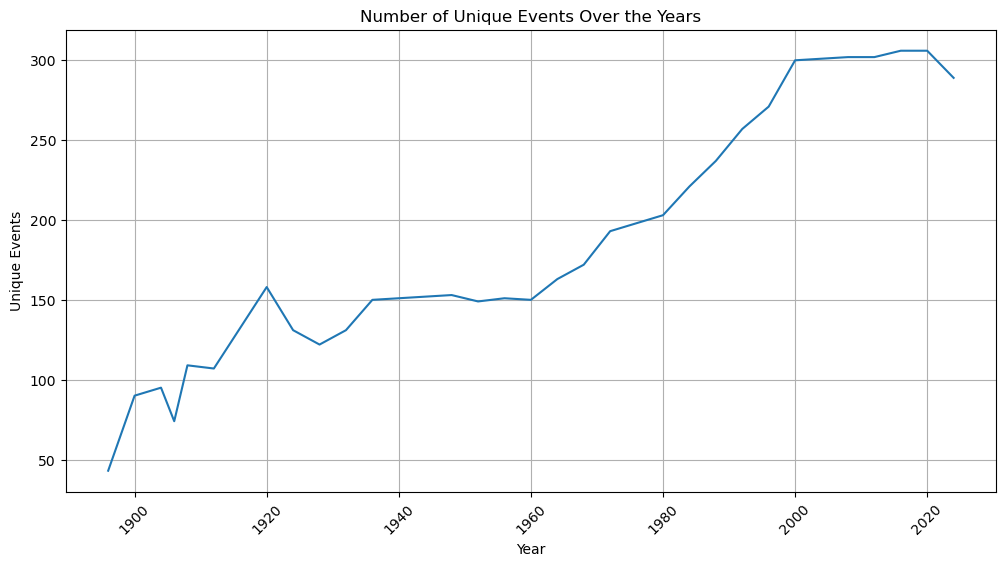

In [9]:
# Historical Research on the Evolution of Olympic Games
events_per_year = data.groupby('Year')['Event'].nunique().reset_index()
events_per_year.rename(columns={'Event': 'Unique Events'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=events_per_year, x='Year', y='Unique Events')
plt.title('Number of Unique Events Over the Years')
plt.xlabel('Year')
plt.ylabel('Unique Events')
plt.xticks(rotation=45)
plt.grid()
plt.show()

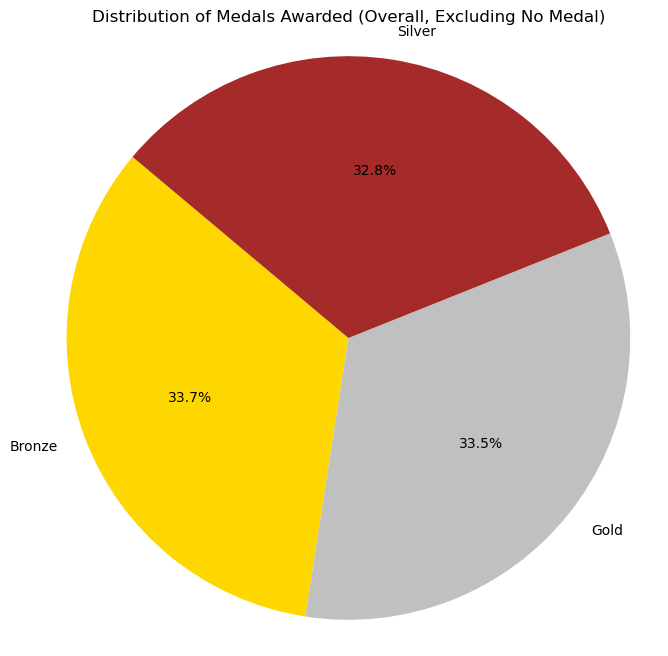

In [14]:
# Medal Distribution Pie Chart (excluding 'No medal')
medal_distribution = data[data['Medal'] != 'No medal']['Medal'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(medal_distribution, labels=medal_distribution.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'silver', 'brown'])
plt.title('Distribution of Medals Awarded (Overall, Excluding No Medal)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

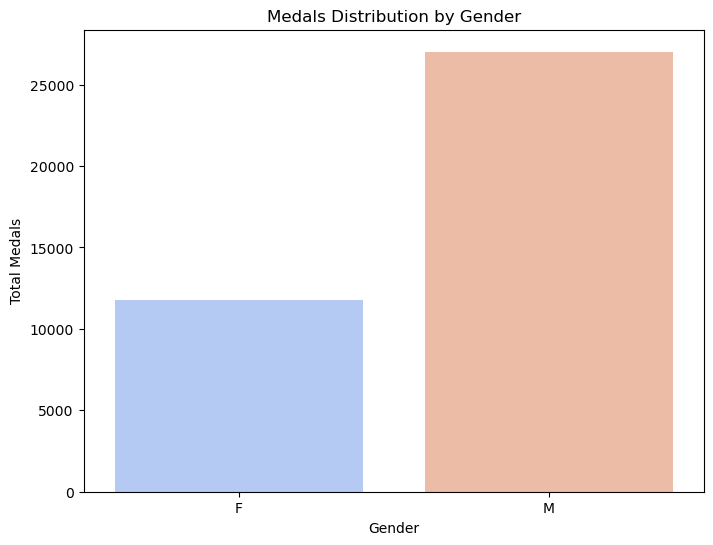

In [10]:
# Additional Insights: Medal Distribution by Gender
gender_medals = data[data['Medal'] != 'No medal'].groupby('Sex')['Medal'].count().reset_index()
gender_medals.rename(columns={'Medal': 'Total Medals'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_medals, x='Sex', y='Total Medals', palette='coolwarm')
plt.title('Medals Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Medals')
plt.show()

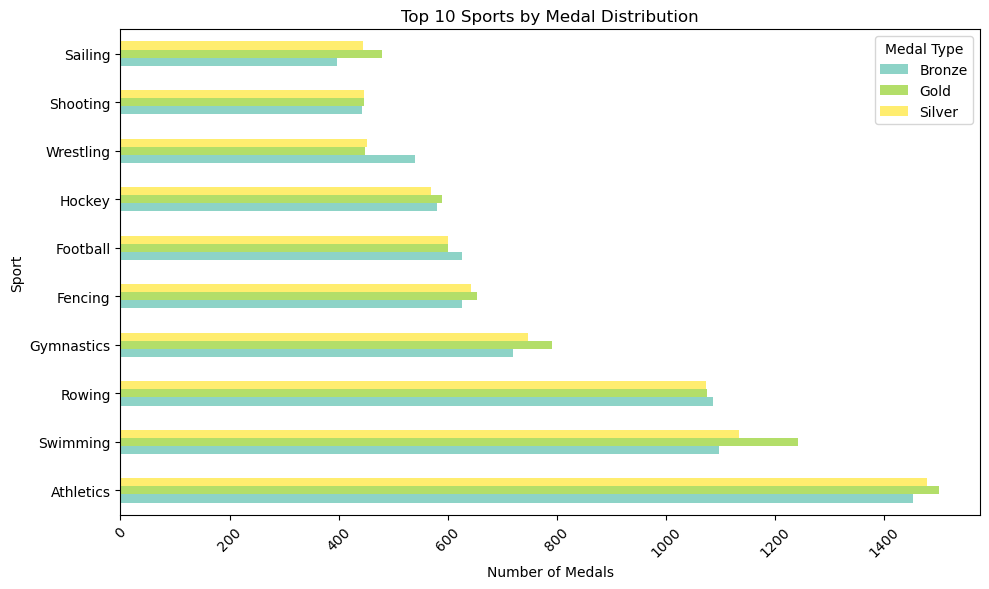

In [17]:
# Medal Distribution by Sport (Top 10 Sports)
top_sports = sport_medal_distribution.sum(axis=1).nlargest(10).index  # Get top 10 sports by total medals
filtered_distribution = sport_medal_distribution.loc[top_sports]

# Plotting as a horizontal bar chart
filtered_distribution.plot(kind='barh', figsize=(10, 6), colormap='Set3')
plt.title('Top 10 Sports by Medal Distribution(Overall)')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.legend(title='Medal Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

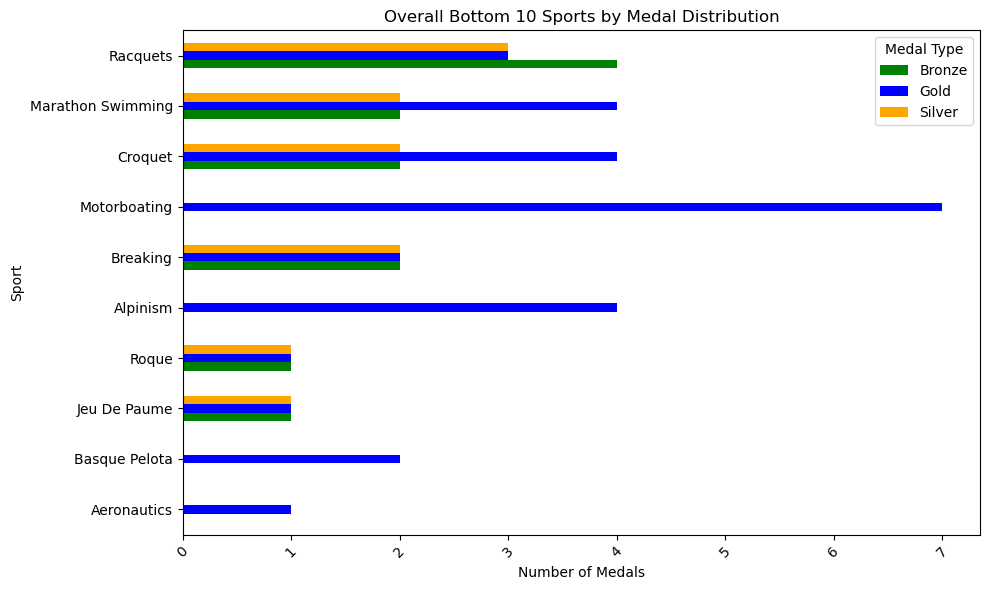

In [21]:
# Medal Distribution by Sport (Bottom 10 Sports)
bottom_sports = sport_medal_distribution.sum(axis=1).nsmallest(10).index  # Get bottom 10 sports by total medals
filtered_distribution = sport_medal_distribution.loc[bottom_sports]

# Define custom colors for each medal type: Green, Blue, and Orange
custom_colors = ['green', 'blue', 'orange']

# Plotting as a horizontal bar chart with custom colors
filtered_distribution.plot(kind='barh', figsize=(10, 6), color=custom_colors)
plt.title('Overall Bottom 10 Sports by Medal Distribution')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.legend(title='Medal Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

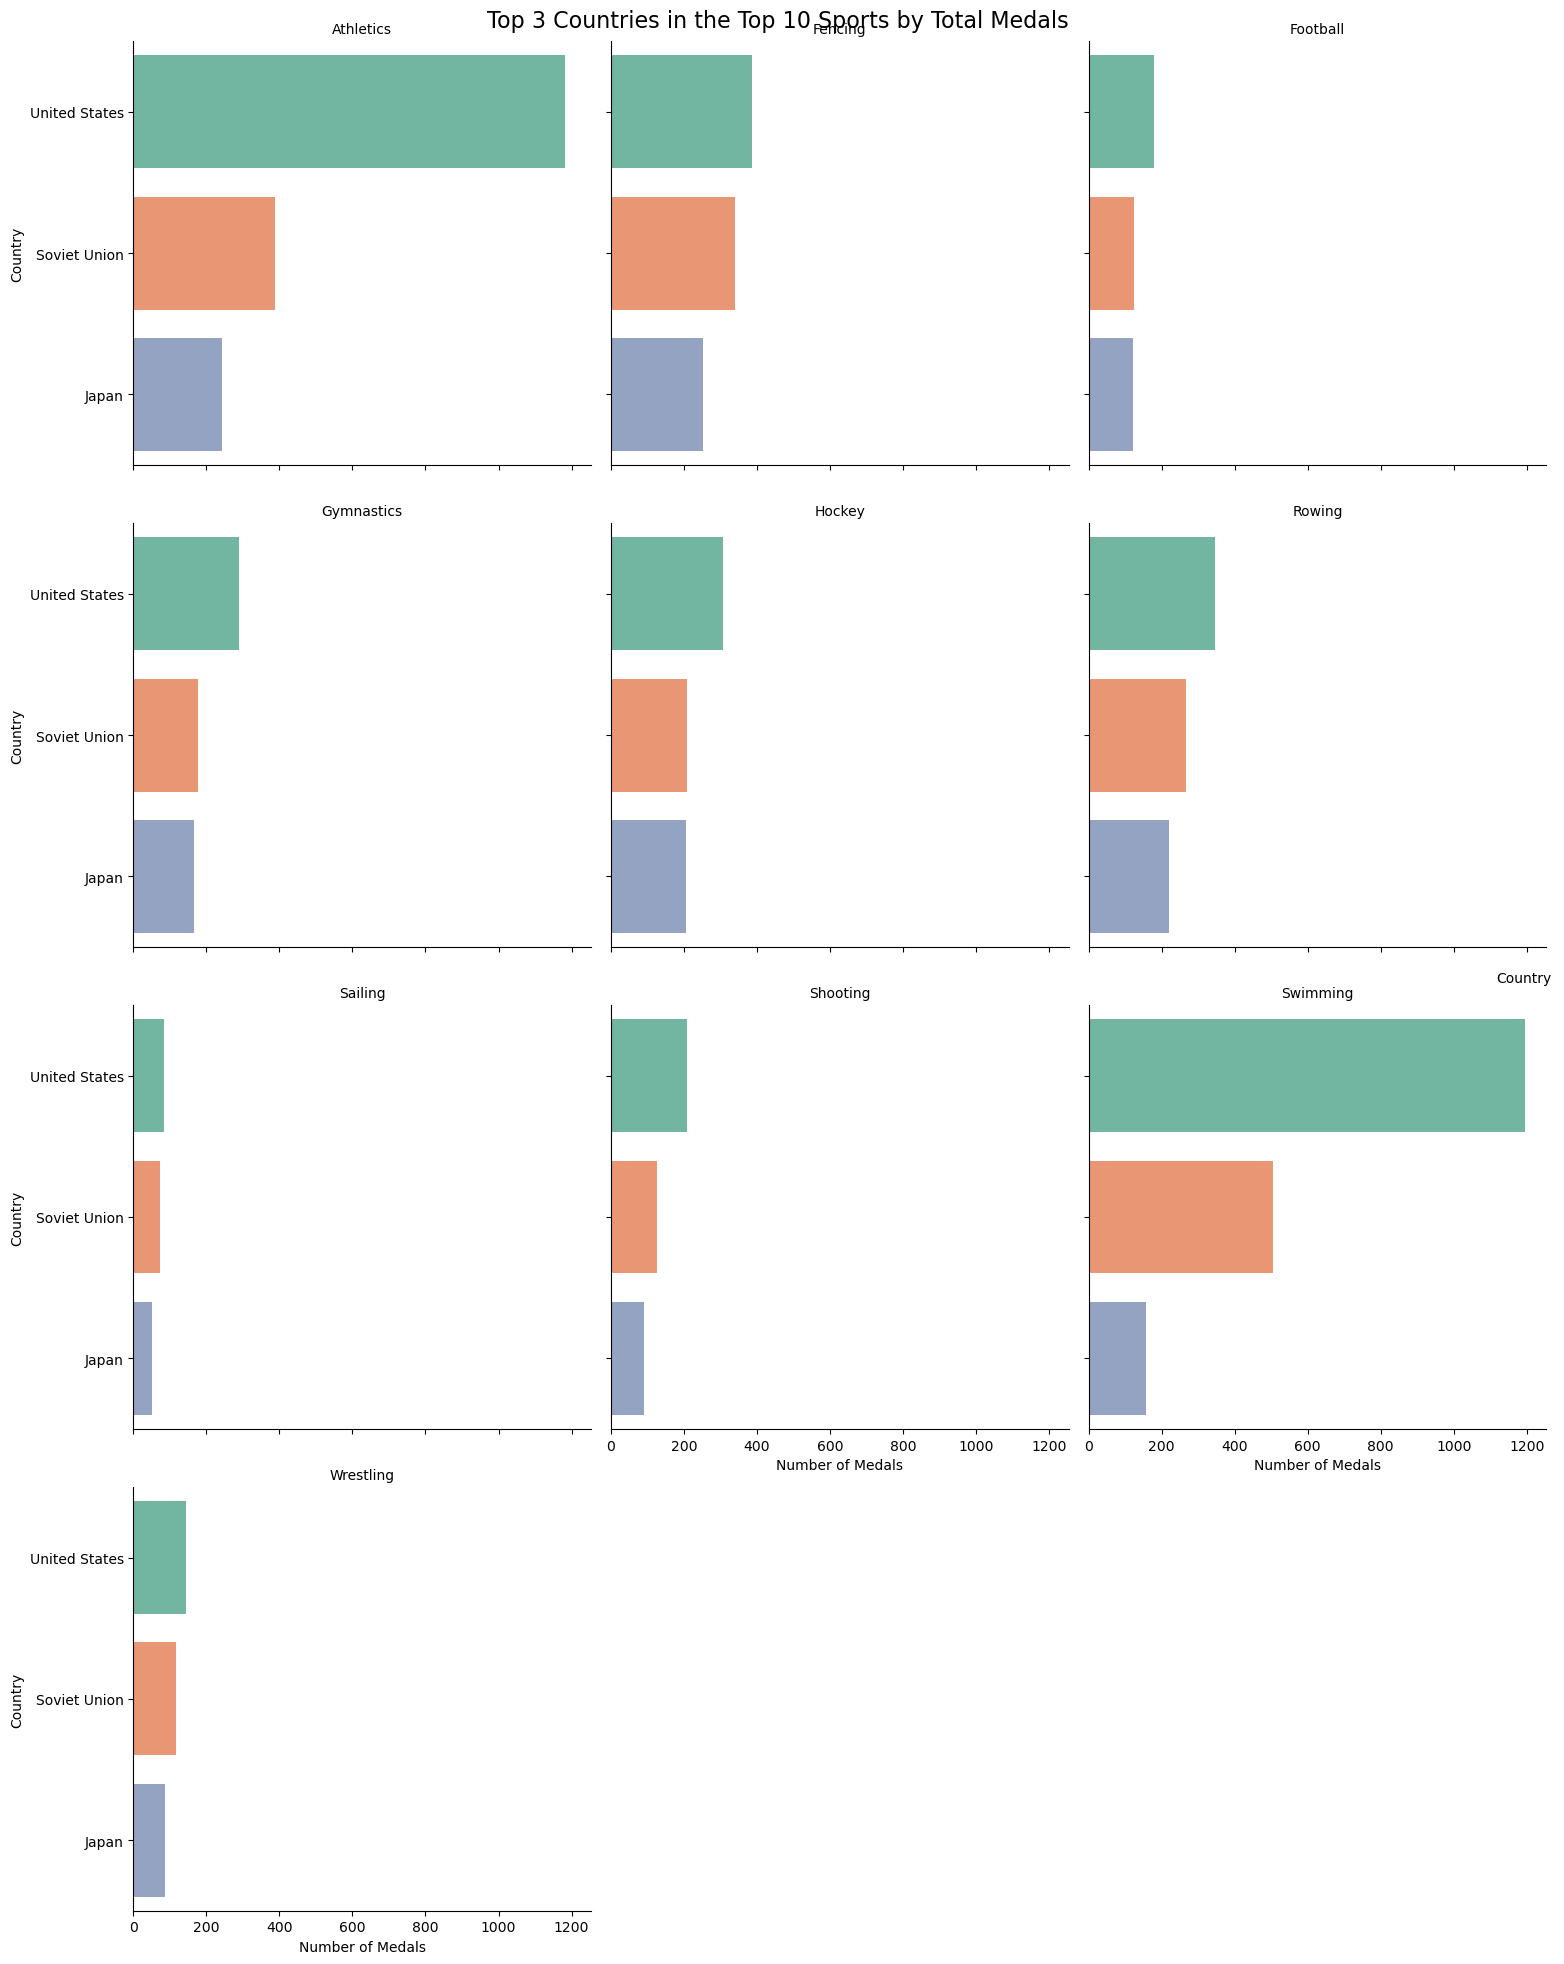

In [27]:


# Step 1: Identify the Top 10 Sports by Total Medals
top_sports = data[data['Medal'] != 'No medal'].groupby('Sport')['Medal'].count().nlargest(10).index

# Step 2: Aggregate Medal Counts for Top 10 Sports by Country
top_sports_countries = data[data['Sport'].isin(top_sports) & (data['Medal'] != 'No medal')]
top_sports_country_medals = top_sports_countries.groupby(['Sport', 'Team'])['Medal'].count().reset_index()
top_sports_country_medals.rename(columns={'Medal': 'Total Medals'}, inplace=True)

# Step 3: Limit to Top 3 Countries per Sport for Clarity
top_countries_per_sport = top_sports_country_medals.groupby('Sport').apply(lambda x: x.nlargest(3, 'Total Medals')).reset_index(drop=True)

# Step 4: Facet Grid Plotting
g = sns.FacetGrid(top_countries_per_sport, col="Sport", col_wrap=3, height=5)
g.map_dataframe(sns.barplot, x='Total Medals', y='Team', palette='Set2')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Number of Medals", "Country")

# Add overall title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for title
g.fig.suptitle('Top 3 Countries in the Top 10 Sports by Total Medals', fontsize=16)

g.add_legend(title='Country')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

C:\Users\ROSEMARY\AppData\Local\Temp\ipykernel_1676\813507921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_over_time.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
C:\Users\ROSEMARY\AppData\Local\Temp\ipykernel_1676\813507921.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medals_over_time['Year'] = medals_over_time['Year'].astype(int)
D:\AnacondaApplication\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

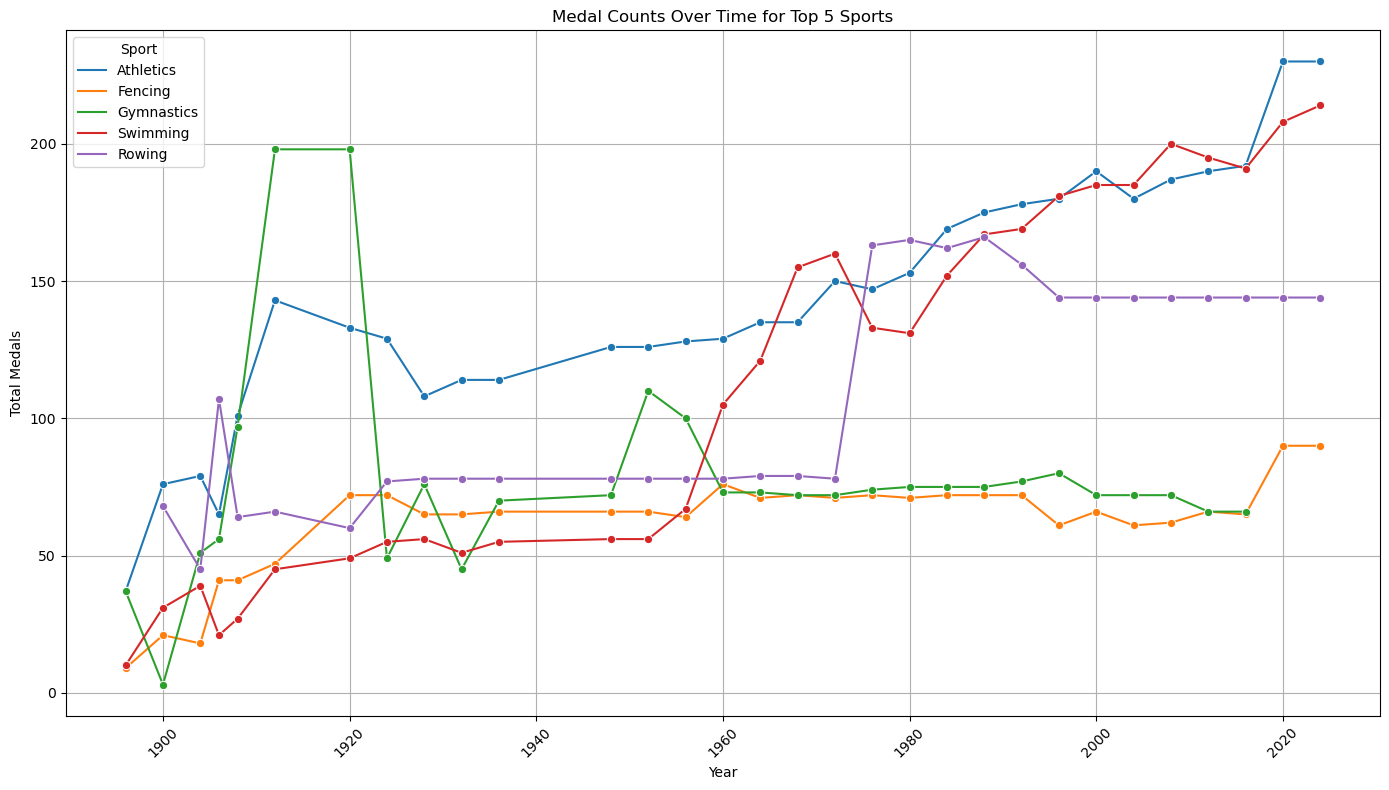

In [30]:

# Step 1: Prepare the data
medals_over_time = data[data['Medal'] != 'No medal']

# Check for infinite values and replace them with NaN
medals_over_time.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Ensure 'Year' is an integer
medals_over_time['Year'] = medals_over_time['Year'].astype(int)

# Step 2: Group by Year and Sport
medals_trends = medals_over_time.groupby(['Year', 'Sport'])['Medal'].count().reset_index()
medals_trends.rename(columns={'Medal': 'Total Medals'}, inplace=True)

# Step 3: Identify the Top 5 Sports by Total Medals
top_sports = medals_trends.groupby('Sport')['Total Medals'].sum().nlargest(5).index

# Step 4: Filter trends for top sports
trend_data = medals_trends[medals_trends['Sport'].isin(top_sports)]

# Step 5: Plotting medal trends for the top 5 sports
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='Year', y='Total Medals', hue='Sport', marker='o')
plt.title('Medal Counts Over Time for Top 5 Sports')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()